In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [5]:
# set seed value

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [11]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_train = X_train.astype("float32")
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype("float32") / 255
Y_train = np_utils.to_categorical(Y_class_train)
Y_test = np_utils.to_categorical(Y_class_test)

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [13]:
# cpu 혼자만으로 감당을 못하기에 gpu 환경에서 꼭 실행해야됨
tf.config.run_functions_eagerly(True)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



Epoch 00001: val_loss improved from inf to 0.05392, saving model to ./model/01-0.0539.hdf5

Epoch 00002: val_loss improved from 0.05392 to 0.04012, saving model to ./model/02-0.0401.hdf5

Epoch 00003: val_loss improved from 0.04012 to 0.03305, saving model to ./model/03-0.0330.hdf5

Epoch 00004: val_loss improved from 0.03305 to 0.03224, saving model to ./model/04-0.0322.hdf5

Epoch 00005: val_loss did not improve from 0.03224

Epoch 00006: val_loss improved from 0.03224 to 0.02926, saving model to ./model/06-0.0293.hdf5

Epoch 00007: val_loss did not improve from 0.02926

Epoch 00008: val_loss did not improve from 0.02926

Epoch 00009: val_loss did not improve from 0.02926

Epoch 00010: val_loss improved from 0.02926 to 0.02887, saving model to ./model/10-0.0289.hdf5

Epoch 00011: val_loss did not improve from 0.02887

Epoch 00012: val_loss improved from 0.02887 to 0.02827, saving model to ./model/12-0.0283.hdf5

Epoch 00013: val_loss improved from 0.02827 to 0.02660, saving model to

In [14]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 6s 19ms/step - loss: 0.0296 - accuracy: 0.9928

 Test Accuracy: 0.9928


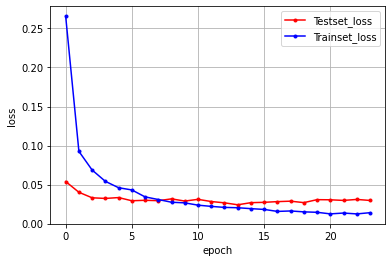

In [15]:
y_vloss = history.history["val_loss"]

y_loss = history.history["loss"]

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")

plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc="upper right")

plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()